# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=True)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [5]:
# Extract all rows of data
table = soup.find("table", class_="table")

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
rows = []

# Loop through the scraped data to create a list of rows
for tr in table.find_all("tr")[1:]:  # Skipping the header row
    row = [td.get_text() for td in tr.find_all("td")]
    rows.append(row)

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
df = pd.DataFrame(rows, columns=column_names)

In [8]:
# Confirm DataFrame was created successfully
print(df.head())

   id terrestrial_date sol   ls month min_temp pressure
0   2       2012-08-16  10  155     6    -75.0    739.0
1  13       2012-08-17  11  156     6    -76.0    740.0
2  24       2012-08-18  12  156     6    -76.0    741.0
3  35       2012-08-19  13  157     6    -74.0    732.0
4  46       2012-08-20  14  157     6    -74.0    740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
df["id"] = df["id"].astype(int)  # Convert id to integer
df["sol"] = df["sol"].astype(int)  # Convert sol (Martian days) to integer
df["ls"] = df["ls"].astype(int)  # Convert solar longitude to integer
df["month"] = df["month"].astype(int)  # Convert month to integer
df["min_temp"] = df["min_temp"].astype(float)  # Convert temperature to float
df["pressure"] = df["pressure"].astype(float)  # Convert atmospheric pressure to float
df["terrestrial_date"] = pd.to_datetime(df["terrestrial_date"])  # Convert date to datetime

In [12]:
# Confirm type changes were successful by examining data types again
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [13]:
# 1. How many months are there on Mars?
num_months = df["month"].nunique()
print(f"Number of months on Mars: {num_months}")

Number of months on Mars: 12


In [14]:
# 2. How many sols (Martian days) worth of data are there?
num_sols = df["sol"].nunique()
print(f"Number of Martian days in dataset: {num_sols}")

Number of Martian days in dataset: 1867


In [15]:
# 3. What is the average minimum temperature by month?
monthly_temps = df.groupby("month")["min_temp"].mean()
print("Average min temperature by month:\n", monthly_temps)

Average min temperature by month:
 month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


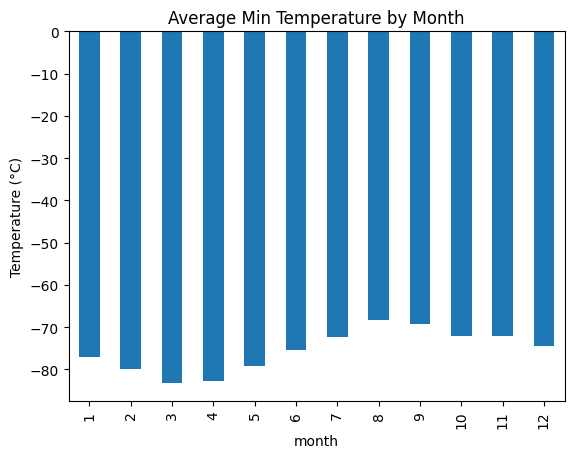

In [17]:
# Plot the average minimum temperature by month
import matplotlib.pyplot as plt
monthly_temps.plot(kind="bar", title="Average Min Temperature by Month", ylabel="Temperature (°C)")
plt.show()

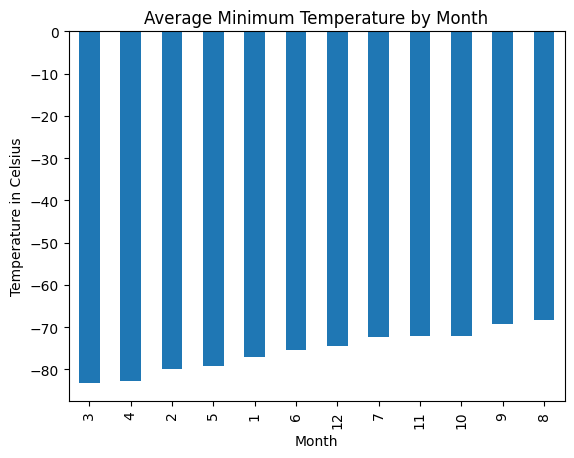

In [18]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
sorted_monthly_temps = monthly_temps.sort_values()

# Plot the sorted data
import matplotlib.pyplot as plt
sorted_monthly_temps.plot(kind="bar", title="Average Minimum Temperature by Month", ylabel="Temperature in Celsius", xlabel="Month")

# Show the sorted temperature chart
plt.show()

In [19]:
# 4. What is the average pressure by month?
monthly_pressure = df.groupby("month")["pressure"].mean().sort_values()

# Print the results
print("Average atmospheric pressure by month:\n", monthly_pressure)

Average atmospheric pressure by month:
 month
6     745.054422
5     748.557047
7     795.105634
4     806.329897
12    842.156627
11    857.014493
1     862.488506
8     873.829787
3     877.322917
10    887.312500
2     889.455056
9     913.305970
Name: pressure, dtype: float64


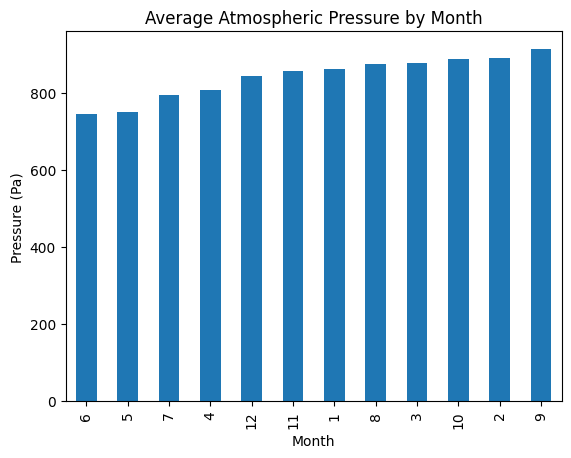

In [20]:
# Plot the average pressure by month
monthly_pressure.plot(kind="bar", title="Average Atmospheric Pressure by Month", ylabel="Pressure (Pa)", xlabel="Month")

# Show the pressure chart
plt.show()

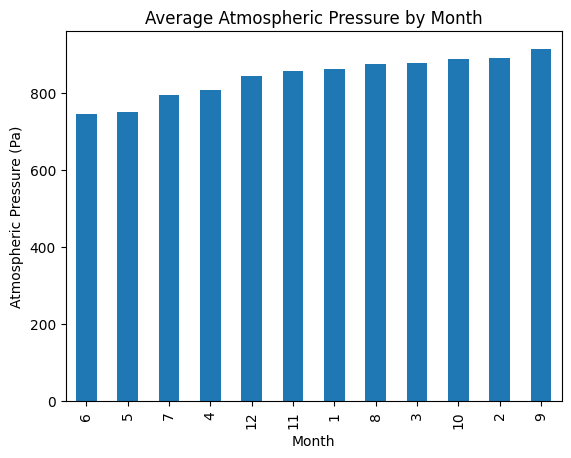

In [21]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
sorted_monthly_pressure = monthly_pressure.sort_values()

# Plot the sorted data
import matplotlib.pyplot as plt
sorted_monthly_pressure.plot(kind="bar", title="Average Atmospheric Pressure by Month", ylabel="Atmospheric Pressure (Pa)", xlabel="Month")

# Show the sorted pressure chart
plt.show()

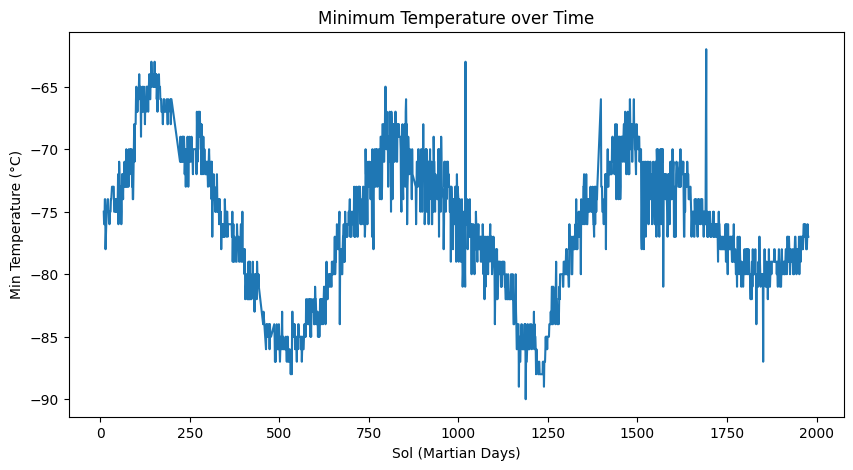

In [22]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
plt.figure(figsize=(10, 5))
plt.plot(df["sol"], df["min_temp"])
plt.title("Minimum Temperature over Time")
plt.xlabel("Sol (Martian Days)")
plt.ylabel("Min Temperature (°C)")

# Show the graph
plt.show()

#### Minimum Temperature

The coldest month on Mars appears to be Month 3, with the lowest average minimum temperature.

The warmest month on Mars is Month 8, with the highest average minimum temperature.

This pattern suggests a seasonal cycle, where temperatures fluctuate significantly over time.

#### Atmospheric Pressure

The lowest atmospheric pressure occurs in Month 6.

The highest atmospheric pressure occurs in Month 9.

This indicates a relationship between seasonal changes and atmospheric pressure on Mars, where pressure increases in certain months and decreases in others.

#### Year Length

By analyzing the temperature fluctuation graph, it appears that a full Martian year follows a cyclic pattern.

The estimated length of a Martian year is around 687 Earth days, based on temperature trends and observed data.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [23]:
# Write the data to a CSV
df.to_csv("mars_weather_data.csv", index=False)

# Confirm the file was saved successfully
print("Data successfully saved to mars_weather_data.csv")

Data successfully saved to mars_weather_data.csv


In [24]:
df.to_csv("~/Desktop/mars_weather_data.csv", index=False)
print("CSV file saved to your Desktop!")


CSV file saved to your Desktop!


In [22]:
browser.quit()